
# GraduateRotational Internship Program


# The-Sparks-Foundation's Task

# Task # 4 - To Explore Decision TreeAlgorithm

For the given ‘Iris’ dataset,we created the Decision Tree classifier and visualized it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data
Let's start to read CSV file of our dateset into a pandas dataframe.

In [2]:
#data=pd.read_csv('https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing')
data=pd.read_csv(r'C:\Users\rockn\Downloads\Iris.csv')

In [3]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Analysis

In [4]:
#to check number of rows and columns in dataframe ( [rows,columns] )
data.shape

(150, 6)

In [5]:
#check columns name
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
#Display the data types of each column using the attribute dtype
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
#check null values are present in dataset or not
data.isnull().head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [8]:
#The describe() function computes a summary of statistics for numeric entries such as count,mean,std,min,etc 
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
#groupby() is used to split data into groups
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# To visualize the distributions of all the features using different plots

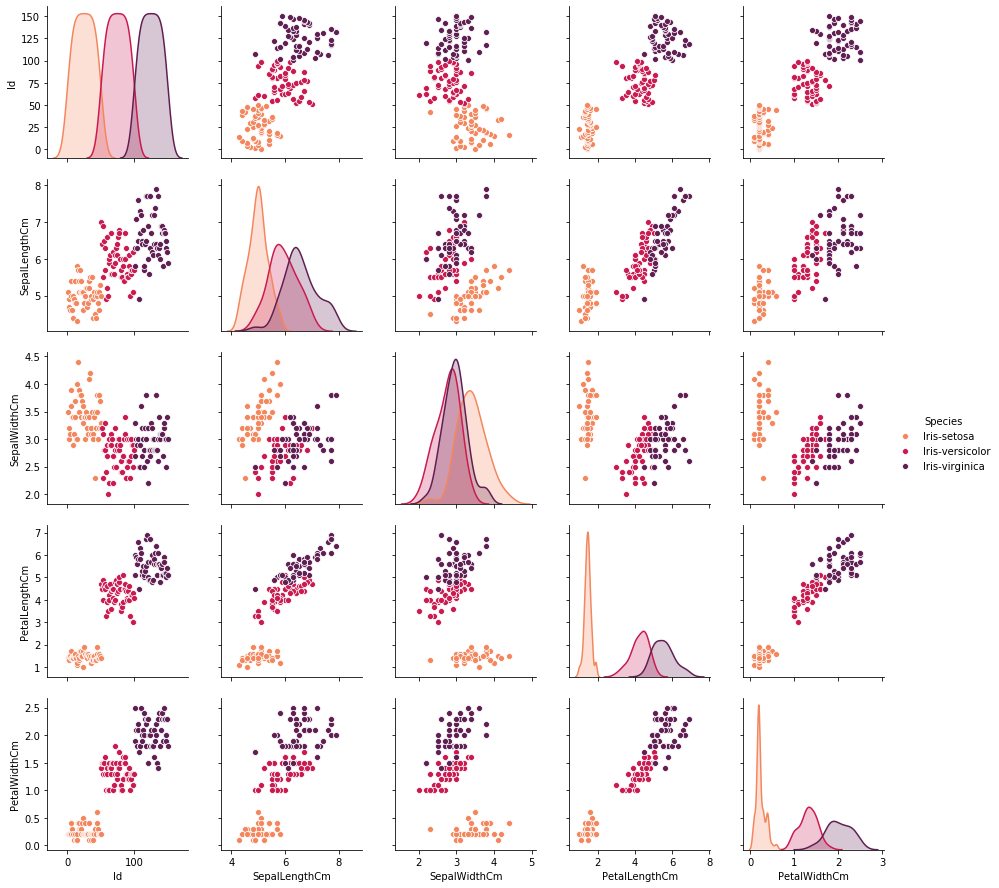

In [11]:
sns.pairplot(data,hue='Species' , palette = 'rocket_r')

# Dropping the ID feature

In [12]:
data.drop(["Id"],axis = 1,inplace = True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


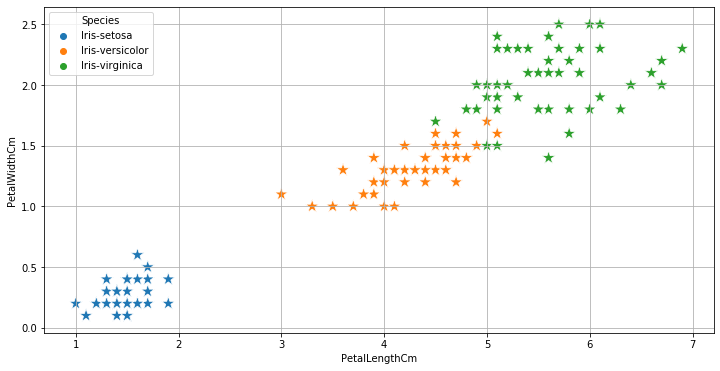

In [13]:
plt.figure(figsize=(12,6))
plt.grid()
sns.scatterplot(x=data['PetalLengthCm'],y=data['PetalWidthCm'],hue=data['Species'],marker='*',s=200)


* if petal_length is less that 2 and petal_width is less than 0.6 then species ia 'setosa'
* if petal_length is between 3 and 5.2 and petal_width is between 1.0 and 1.7 then species ia 'versicolor'
* if petal_length is greater that 5.2 and petal_width is greater than 1.7 then species ia 'virginica'

# Building a Machine Learning Model

# Train Test Split
Spliting data for Training and Testing where 'x' training data and 'y' is testing data

In [14]:
# spliting data for Training and Testing where 'x' training data and 'y' is testing data
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = data[features]
y = data.Species

In [15]:
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [16]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


# Implementing train test split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Decision Tree Algorithm

In [18]:
from sklearn import tree

In [19]:
cls = tree.DecisionTreeClassifier(random_state=0)
cls = cls.fit(X,y)

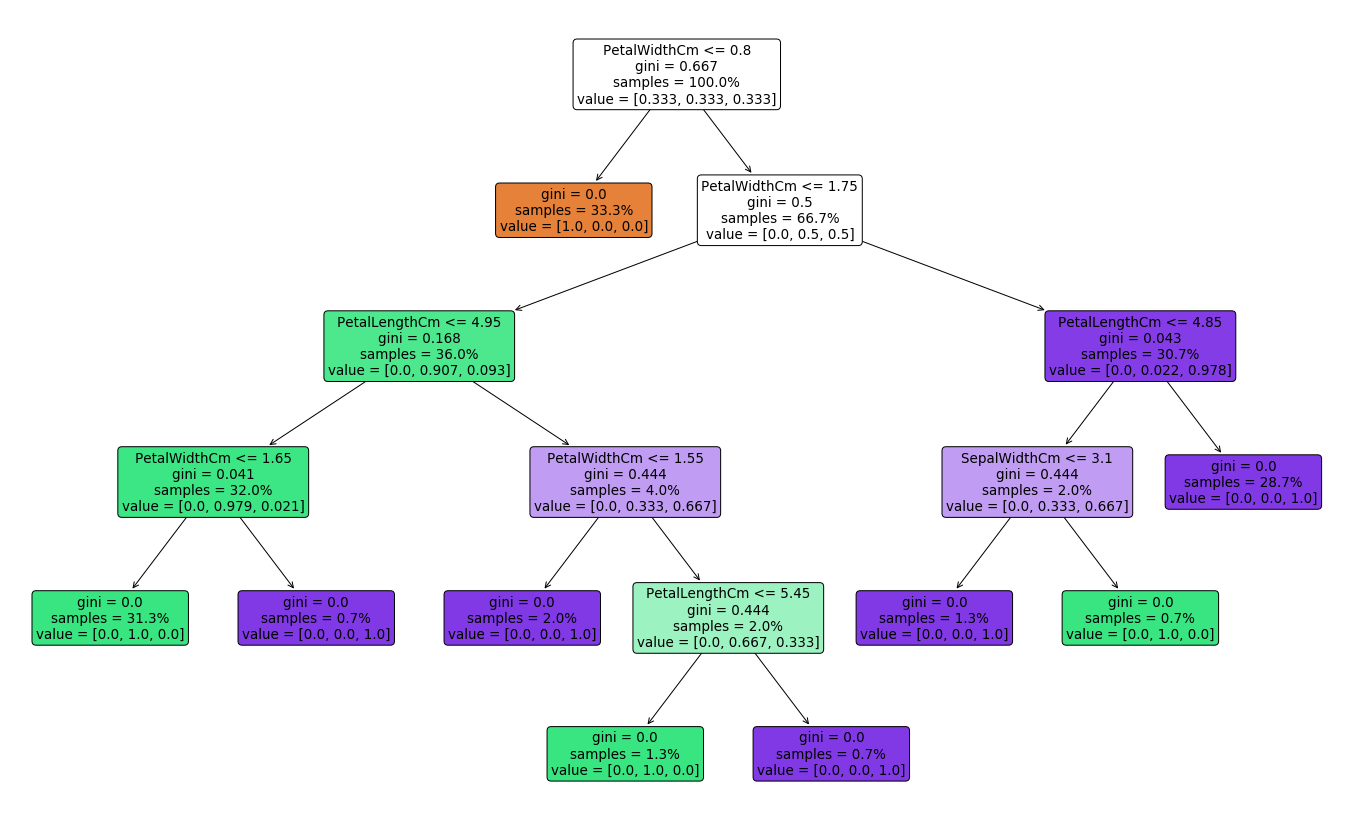

In [20]:
plt.figure(figsize=(24,15))
tree.plot_tree(cls.fit(X,y),feature_names=features,filled=True,precision=3,
              proportion=True,rounded=True)
plt.show()


In [21]:
print(tree.export_text(cls))

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: Iris-virginica



# Training and Predicting
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [22]:
y_pred = cls.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Using KNN classifier to check the accuracy

In [28]:
accuracy=[]
for k in range(1,50,2):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=metrics.accuracy_score(y_test,y_pred)
    accuracy.append(acc)
print(accuracy)

[1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9]


49


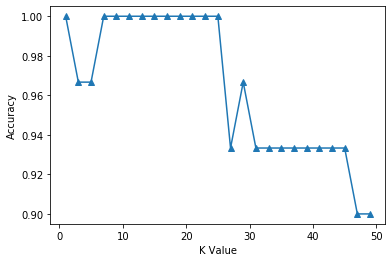

In [29]:

K=[]
for i in range(1,50,2):
    K.append(i)    
plt.plot(K,accuracy,'-^')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
print(k)

In [34]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
acc=metrics.accuracy_score(y_test,y_pred)
print("Accuracy is : {:.3f}".format(acc*100),"%" )

Accuracy is : 96.667 %


# Prediction

In [39]:
X=model.predict([[2.0,1.5,0.9,2.8]])
print("According to data ,  flower specie is :",X)

According to data ,  flower specie is : ['Iris-setosa']


In [40]:
sepl=float(input("Enter sepal length : "))
sepw=float(input("Enter sepal width : "))
petl=float(input("Enter prtal length : "))
petw=float(input("Enter petal width : "))

X=model.predict([[sepl,sepw,petl,petw]])
print("According to data , flower specie is :",X)

Enter sepal length : 2
Enter sepal width : 4
Enter prtal length : 3.9
Enter petal width : 2.8
According to data , flower specie is : ['Iris-versicolor']


# Thank You